In [35]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline
import os
import seaborn as sns
import statsmodels.api as sm

from scipy import stats
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold, KFold

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import preprocessing


In [2]:
df = pd.read_csv('rbess_features_val.csv', index_col = 'accounts addresses')

In [3]:
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,predictor
accounts addresses,,,,,,,,,,,,,,,,
103,257.60,252.63,277.98,276.22,281.88,280.55,34,32541,176525,526.11,532.89,476.92,490.43,451.38,471.29,1
616,126.85,111.16,265.39,267.40,280.57,279.35,3,1897,92166,331.61,328.51,471.94,489.86,456.02,474.70,1
9,267.50,268.45,280.59,278.13,281.85,280.47,94,69558,210184,469.86,491.67,457.03,474.64,452.14,471.63,1
424,50.32,458.47,273.52,271.78,279.91,278.93,1,1454,78784,150.50,414.39,499.87,520.01,455.46,473.62,1
38,272.70,270.47,279.91,278.93,281.93,280.74,111,77330,214882,503.03,520.97,455.46,473.62,451.73,471.88,1


In [4]:
X = df.iloc[:, :-1]
y = df['predictor']

In [5]:
# Для оценки качества полученной классификации рассмотрим матрицу ошибок.
"""
    Функция conf_matrix для расчета TP (true positives), FP (false positives), TN (true negatives), FN (false negatives)  
    y_true: массив array, истинные отклики
    y_true: массив array, предсказанные классификатором отклики
"""

def conf_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels = ['Не мошенник', 'Мошенник'])
    disp.plot(cmap='Greens')
    plt.rcParams["axes.grid"] = False
    font = {'size' : 12}
    plt.rc('font', **font)
    plt.show()

In [22]:
# Разделяем на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 21, stratify = y)

In [7]:
# #  Стандартизация предикторов
# scaler = StandardScaler()   #   среднее 0, ст.отклонение 1

# scaler.fit(X_train)

# #  Важно: одинаковые параметры стандартизации у обучающего и тестового множества!
# X_train = scaler.transform(X_train)  
# X_test = scaler.transform(X_test)  

In [23]:
clf = LogisticRegression(penalty='l2',
                   dual=False,
                   tol=0.001,
                   C=1.0,
                   fit_intercept=True,
                   intercept_scaling=1,
                   class_weight=None,
                   random_state=None,
                   solver='lbfgs',
                   max_iter=1000,
                   multi_class='auto',
                   verbose=0,
                   warm_start=False,
                   n_jobs=None,
                   l1_ratio=None)

clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

На тестовой выборке:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       447
           1       0.00      0.00      0.00         0

    accuracy                           0.95       447
   macro avg       0.50      0.47      0.49       447
weighted avg       1.00      0.95      0.97       447



C:\Users\qwerty\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\qwerty\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\qwerty\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


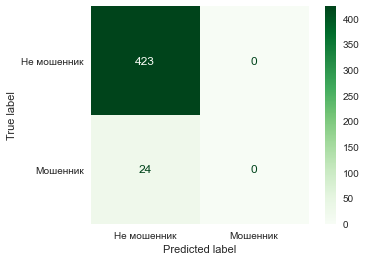

In [24]:
print('На тестовой выборке:')
print(classification_report(y_pred_test, y_test))
conf_matrix(y_test, y_pred_test)

На тестовой выборке:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       391
           1       0.33      0.14      0.20        56

    accuracy                           0.86       447
   macro avg       0.61      0.55      0.56       447
weighted avg       0.82      0.86      0.83       447



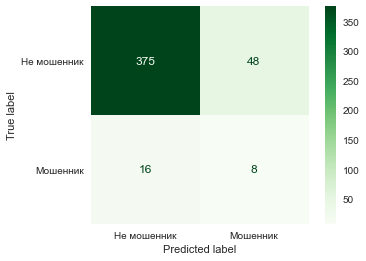

In [32]:
clf = LogisticRegression(penalty='l2',
                   dual=False,
                   tol=0.01,
                   C=1.0,
                   fit_intercept=True,
                   intercept_scaling=1,
                   class_weight={0:1, 1:10},
                   random_state=None,
                   solver='liblinear',
                   max_iter=1000,
                   verbose=0,
                   warm_start=False,
                   n_jobs=None,
                   l1_ratio=None)

clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

print('На тестовой выборке:')
print(classification_report(y_pred_test, y_test))
conf_matrix(y_test, y_pred_test)

In [43]:
estimator_logreg = Pipeline([('scaler', preprocessing.StandardScaler()),
                               ('logReg', LogisticRegression(max_iter = 1000, solver='liblinear')) ])

parameters_logreg = {
    'logReg__penalty': ('l2','l1', None),
    'logReg__tol': (0.01, 0.001),
    'logReg__class_weight': ({0:1, 1:5}, {0:1, 1:10}, {0:1, 1:15}, {0:1, 1:20}),
    'logReg__C': (0.5, 1.0)}


grid_CV = GridSearchCV(
    estimator=estimator_logreg,
    param_grid=parameters_logreg,
    scoring = 'recall',
    cv = StratifiedKFold(n_splits=5)
)
grid_CV.fit(X_train, y_train)

C:\Users\qwerty\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\qwerty\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\qwerty\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\qwerty\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.pena

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logReg',
                                        LogisticRegression(max_iter=1000,
                                                           solver='liblinear'))]),
             param_grid={'logReg__C': (0.5, 1.0),
                         'logReg__class_weight': ({0: 1, 1: 5}, {0: 1, 1: 10},
                                                  {0: 1, 1: 15},
                                                  {0: 1, 1: 20}),
                         'logReg__penalty': ('l2', 'l1', None),
                         'logReg__tol': (0.01, 0.001)},
             scoring='recall')

Лучшие значения гиперпараметров:
 {'logReg__C': 0.5, 'logReg__class_weight': {0: 1, 1: 20}, 'logReg__penalty': 'l2', 'logReg__tol': 0.01}
На тестовой выборке:
              precision    recall  f1-score   support

           0       0.58      0.98      0.73       251
           1       0.79      0.10      0.17       196

    accuracy                           0.59       447
   macro avg       0.69      0.54      0.45       447
weighted avg       0.67      0.59      0.49       447



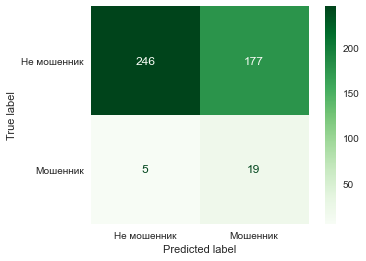

In [44]:
#   Лучший набор значений гиперпараметров
best_hyperparams = grid_CV.best_params_
print('Лучшие значения гиперпараметров:\n', best_hyperparams)

best_model = grid_CV.best_estimator_

y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)


print('На тестовой выборке:')
print(classification_report(y_pred_test, y_test))
conf_matrix(y_test, y_pred_test)